# Household Energy Consumption Analysis

## - Spandan Gandhi, Ishan Saraswat and Meghana Kavakuntala, Carnegie Mellon University

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import itertools

%matplotlib inline


In [2]:
f = open('ProjectData3.csv')
data = pd.read_table(f,sep=',', header='infer', encoding = "utf-8")
data.head()

,ï»¿Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,12-16-06,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,12-16-06,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,12-16-06,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,12-16-06,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,12-16-06,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
data.rename(columns={'ï»¿Date': 'Date'}, inplace=True)

In [4]:
data['Timestamp']=pd.to_datetime(data['Date']+ ' '+data['Time'])


Data has been recorded for 728 days 04:14:00.
Number of samples collected:  1048575


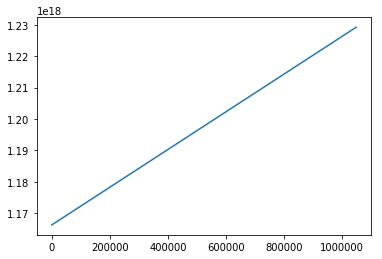

In [5]:
#Temporal data

plt.plot(data['Timestamp'])

#print("recorded for {}.".format(data['Time'].iloc[0] - data['Time'].iloc[-1]))
print("Data has been recorded for {}.".format(data['Timestamp'].iloc[-1]-data['Timestamp'].iloc[0]))
print("Number of samples collected: ",len(data))

In [6]:
data.isnull().sum(axis=0)

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
Timestamp                   0
dtype: int64

In [7]:
data=data.drop(['Date','Time'],axis=1)
data.set_index('Timestamp')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [8]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timestamp
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [9]:
# Storing all the NaN value indexes
idx_null=data.index[data.Sub_metering_3.isnull()]
print(len(idx_null))

#Calculating the mean of the values of 'Sub_metering_3'
# Replacing the NaN values with the mean of the 'Sub_metering_3' observations

meanNull=data.mean()
data.fillna(value=meanNull,inplace=True)


    
#timestamp differences
print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(data['Timestamp']))))
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(data['Timestamp']))) )
print("The data is spaced uniformly")

#1 minute=60000120000
#Therefore resolution is 1 minute

4069
The minimum difference between any two consecutive timestamps is: 60000000000 nanoseconds
The maximum difference between any two consecutive timestamps is: 60000000000 nanoseconds
The data is spaced uniformly


In [10]:
#creating Daily load curves
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.date
data.head()
# data[['Voltage']]= data[['Voltage']].apply(pd.to_numeric)
# data.index = data.Timestamp
# data.resample('1H').agg({'Voltage' : ['sum']})
print(data['Timestamp'].dtype)
#data['Voltage'].apply(str(data['Voltage']))
# data['Voltage']=float(data['Voltage'])
# SubData=data.iloc[0:,6:9]
'''
questions=[]
count=0
#For checking the indices where 
for i in range(len(data)):
    for j in range(12):
        if data.iloc[i,j]==np.nan:
            print(i)
            data.interpolate(method='linear')
            questions.append(i)

            
'''
data.dtypes






# for i in range(len(data)):
#     #for j in range(12):
#         if data.iloc[i,j]=='?':
#             print((data['Sub_metering_2'].iloc[i]),i)
# #            questions[count]=i
#             count+=1
# #print(questions)   
# data.dtypes




# data['Voltage'] = data['Voltage'].str.replace(' ', '')
# data['Voltage'] = data['Voltage'].astype(float)       
#print(data['Sub_metering_3'].iloc[6])


# SubData.astype(float64)
#print(data['Day'])
#data['DayOfWeek'] = data.index.dayofweek
#Daily=SubData.groupby(['Day', 'Hour']).sum()
#Daily
#Daily

datetime64[ns]


Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Timestamp                datetime64[ns]
Hour                              int64
Day                              object
dtype: object

In [11]:
data.isnull().sum(axis=0)

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Timestamp                0
Hour                     0
Day                      0
dtype: int64

Text(0.5,0,'data points')

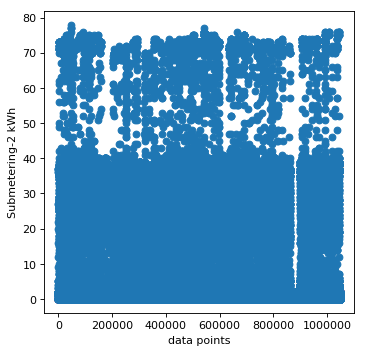

In [12]:
# Trying to plot scatter plots
plt.figure(figsize=(5,5),dpi=80)
plt.scatter(range(len(data)),data['Sub_metering_2']) 
plt.ylabel('Submetering-2 kWh')
plt.xlabel('data points')

Hour            0       1       2       3       4       5       6       7   \
Day                                                                          
2006-12-16     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2006-12-17   6.146   8.216   4.694   4.772   5.608   3.614   5.690   3.588   
2006-12-18   5.944   9.114   6.544   8.866   4.800   7.316   6.774   9.180   
2006-12-19   5.570   4.552   6.344   4.380   6.148   4.252   6.408   5.066   
2006-12-20   8.760   3.400   7.416   4.108   5.846   4.632   3.994  11.538   
2006-12-21   9.332   7.310   2.358   7.192   2.550   6.350   3.190   5.030   
2006-12-22   4.748   5.562   4.756   5.612   4.336   5.044   5.166   6.364   
2006-12-23   4.948   7.044   4.088   6.400   3.862   6.766   4.310   3.332   
2006-12-24   5.440   3.106   6.224   4.314   4.074   6.508   3.040   5.980   
2006-12-25   7.708   6.114   7.398   4.422   3.280   8.404   4.148   3.300   
2006-12-26   4.442   7.508   2.934   5.026   7.258   3.988   4.0

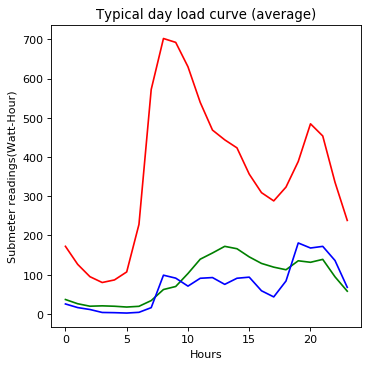

In [13]:
 
Daily_V=data.groupby(['Day', 'Hour'])['Voltage'].mean().unstack()
Daily_I=data.groupby(['Day', 'Hour'])['Global_intensity'].mean().unstack()
Daily_AP=data.groupby(['Day', 'Hour'])['Global_active_power'].sum().unstack()
Daily_RP=data.groupby(['Day', 'Hour'])['Global_reactive_power'].sum().unstack()
Daily_S1=data.groupby(['Day', 'Hour'])['Sub_metering_1'].sum().unstack()
Daily_S2=data.groupby(['Day', 'Hour'])['Sub_metering_2'].sum().unstack()
Daily_S3=data.groupby(['Day', 'Hour'])['Sub_metering_3'].sum().unstack()
print(Daily_RP)

plt.figure(figsize=(5,5),dpi=80)
plt.plot(Daily_S3.mean(),color='red',label='S3')
plt.plot(Daily_S2.mean(),color='green',label='S2')
plt.plot(Daily_S1.mean(),color='blue',label='S1')
plt.xlabel('Hours')
plt.ylabel('Submeter readings(Watt-Hour)')
plt.title('Typical day load curve (average)')
plt.show()


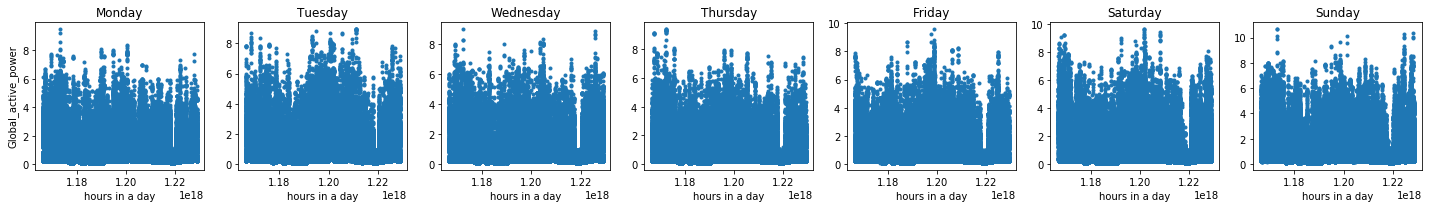

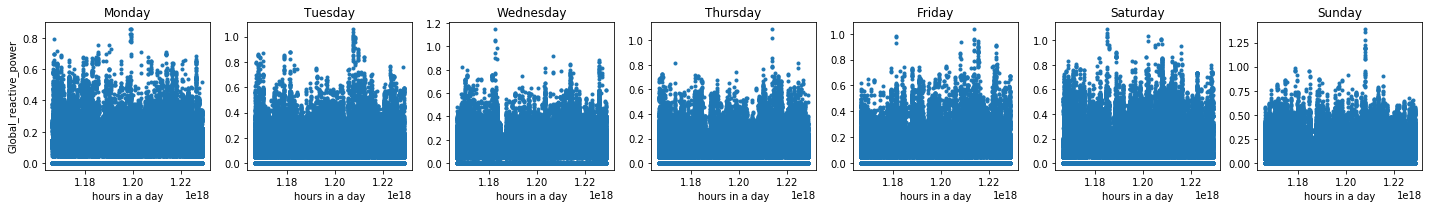

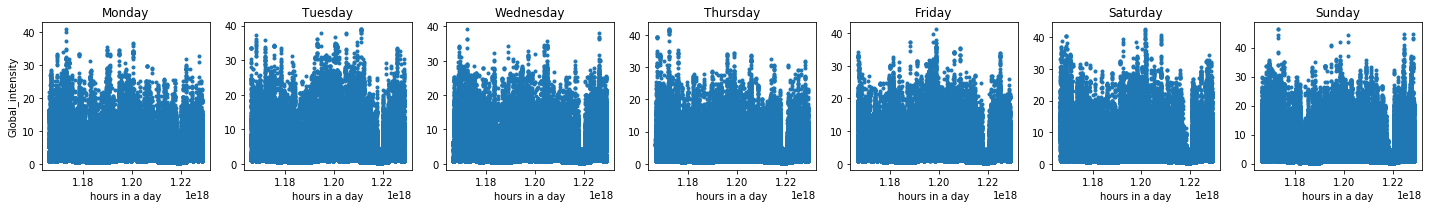

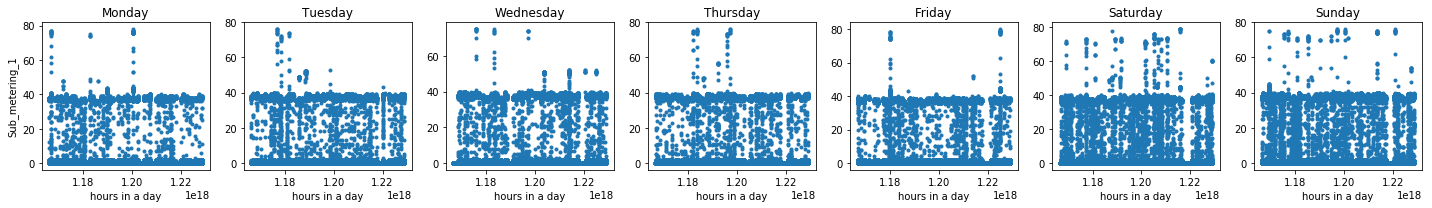

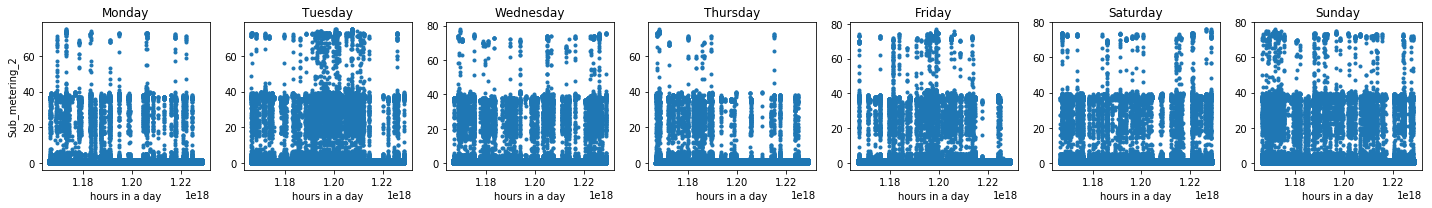

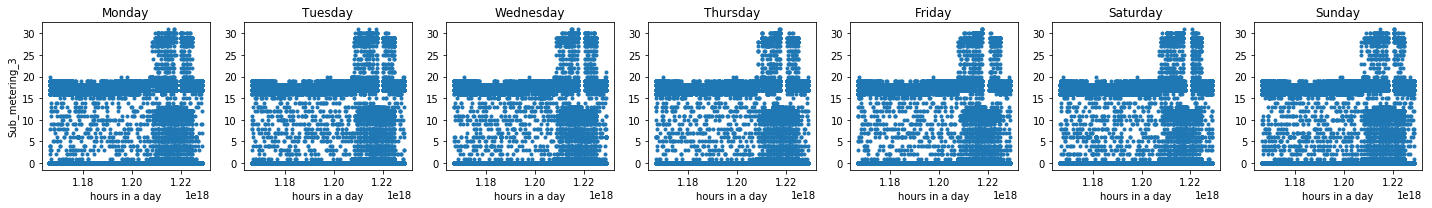

In [14]:
def loadcurves(x):
    week_days = np.array([m.to_pydatetime().weekday() for m in data['Timestamp']])

    #plt.plot(1 for x in data['Time'] for i in range(24) if x.dt.hour[0]==i )
    Monday = data.iloc[week_days == 0]
    Tuesday = data.iloc[week_days == 1]
    Wednesday = data.iloc[week_days == 2]
    Thursday = data.iloc[week_days == 3]
    Friday = data.iloc[week_days == 4]
    Saturday = data.iloc[week_days == 5]
    Sunday = data.iloc[week_days == 6]

    All = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
    Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    fig = plt.figure(figsize=(20,3))
    for j in range(7):
        plt.subplot(1,7,j+1)
        time = np.array(All[j]['Timestamp'])
        # plot the power vs the hours in a day
        plt.plot(time,All[j][x],'.') 
        plt.xlabel('hours in a day')
        if j == 0:
            plt.ylabel(x)
        plt.title(Days[j])
    fig.tight_layout()
    plt.show()

loadcurves('Global_active_power')
loadcurves('Global_reactive_power')
loadcurves('Global_intensity')
loadcurves('Sub_metering_1')
loadcurves('Sub_metering_2')
loadcurves('Sub_metering_3')

In [ ]:


for i in range(0,len(data)):
    if i==0:
        data['deltacurrent']=0
    else:
        data['deltacurrent'][i]=data['Global_intensity'][i]-data['Global_intensity'][i-1]
    
print((data['deltacurrent']))
plt.plot(data['deltacurrent'])

In [ ]:
plt.plot(data['deltacurrent'][0:200])

In [ ]:
def delta(data,x,y):
    for i in range(0,len(data)):
        if i==0:
            data[y]=0
        else:
            data[y][i]=data[x][i]-data[x][i-1]
    
    print((data[y]))
    plt.plot(data[y])

delta(data,'Sub_metering_3','delta_SM3')

In [ ]:
plt.scatter(data['Global_intensity'],data['Voltage'],s=0.01)

In [ ]:
data.head()


In [ ]:
data['Real_power']=(((data['Global_active_power'])**2)+((data['Global_reactive_power'])**2))**0.5
print(data['Real_power'])

In [ ]:
data.index = data['Timestamp']
data.head()


In [ ]:
print(Daily_RP)

In [ ]:
data['Day of Week'] = data['Timestamp'].dt.dayofweek
Daily_V_W=data.groupby(['Day of Week', 'Hour'])['Voltage'].mean().unstack()
Daily_I_W=data.groupby(['Day of Week', 'Hour'])['Global_intensity'].mean().unstack()
Daily_RP_W=data.groupby(['Day of Week', 'Hour'])['Global_active_power'].sum().unstack()
Daily_RP_W=data.groupby(['Day of Week', 'Hour'])['Global_reactive_power'].sum().unstack()
Daily_S1_W=data.groupby(['Day of Week', 'Hour'])['Sub_metering_1'].sum().unstack()
Daily_S2_W=data.groupby(['Day of Week', 'Hour'])['Sub_metering_2'].sum().unstack()
Daily_S3_W=data.groupby(['Day of Week', 'Hour'])['Sub_metering_3'].sum().unstack()

In [ ]:
print(Daily_RP_W)

In [ ]:
def normalize(x):
    a = np.sum(x[1:],axis=1)
    d = (x[1:].T/a).T
   
    return a,d,x.values[1:]
    
Daily_RP_N = normalize(Daily_RP)
print(Daily_RP_N[2])

In [ ]:
def dailyConsumptionDensity(a):
    plt.figure()
    plt.hist(a, normed=True, bins=100)
[dailyConsumptionDensity(x[0]) for x in Daily_RP_N]

In [ ]:
def dailyConsumptionCum(a):
    plt.figure()
    plt.hist(a/1000, normed=True, bins=1000, cumulative=True)
[dailyConsumptionCum(x[0]) for x in Daily_RP_N]

In [ ]:
Daily_RP.dtypes

In [ ]:
def hourlyConsumptionDensity(d):
    plt.figure()
    
    plt.hist(d, normed=True, bins=100)
    
def hourlyConsumptionCum(d):
    plt.figure()
    
    plt.hist(d, normed=True, bins=100, cumulative=True)
    
[hourlyConsumptionDensity(Daily_RP_N[2])]

In [ ]:
def boxplot(x):
    daysOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    # print(week_days)
    data['Weekday'] = data['Timestamp'].dt.dayofweek 
    data['Hour']=data['Timestamp'].dt.hour
    data.boxplot(by='Weekday',column=[x]) # Plotting for Porter Hall
    plt.ylabel('Consumption(Watt)')
    plt.title('Box plot')
    plt.xticks([1, 2, 3,4,5, 6,7],daysOfWeek)
    data.groupby('Weekday').boxplot(by="Hour",column=[x],figsize=(20,20),layout=(3,3)) # 7 subplots of Porter hall hour-wise

boxplot('Global_active_power')

In [ ]:
def violinplot(a):
    plt.figure()
    g=sns.violinplot(x="Weekday", y='Global_active_power', data=data,size=10, aspect=.7) # Plotting for Porter Hall
    #sns.plt.title('Porter Hall')
    plt.figure()
    for i in range(7):
            plt.subplot(7,1,i+1)
            ax = sns.violinplot(x="Hour", y='Global_active_power', data=data,size=10, aspect=.7)

violinplot('Global_active_power')

In [ ]:
print(Daily_RP_N[1])

In [ ]:
def plot_loadCurves_ugly(data):
    plt.plot(np.array(data[1].T))
plot_loadCurves_ugly(Daily_RP_N)

In [ ]:
def plot_loadCurves_nice(d):
    plt.plot(d[1].T, color='g', alpha=0.1)
    plt.plot(np.mean(d[1],axis=0), color='k', alpha=1, linewidth='3')
    
plot_loadCurves_nice(Daily_RP_N)

In [ ]:
def group_mean(x):
    Daily=data.groupby(['Day', 'Hour'])[x].mean().unstack()
    return Daily

def group_sum(x):
    Daily=data.groupby(['Day', 'Hour'])[x].sum().unstack()
    return(Daily)


In [ ]:
def analysis(data):
    G = group_mean(data)
    N = normalize(G)
    [dailyConsumptionDensity(x[0]) for x in N]
    [dailyConsumptionCum(x[0]) for x in N]
    [hourlyConsumptionDensity(N[2])]
    boxplot(data)
    violinplot(data)
    plt.show()
    plot_loadCurves_ugly(N)
    plt.show()
    plot_loadCurves_nice(N)
    
analysis('Global_active_power')
    